In [1]:
# Basic Python Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

# Natural Language Processing
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Scikit-Learn (Machine Learning Library for Python)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
url = "https://raw.githubusercontent.com/ataislucky/Data-Science/main/dataset/emotion_train.txt"
data = pd.read_csv(url, sep=';')
data.columns = ["Text", "Emotions"]
data.reset_index(inplace=True,drop=True)

print("Shape of the DataFrame:",data.shape)
print(data.sample(5))

Shape of the DataFrame: (15999, 2)
                                                    Text Emotions
15968  i can only feel sympathy for you if you are su...  sadness
2731   i feel like garbage i cant think about being t...      joy
7688   i would feel even more clever had i actually i...      joy
3259   i feel so blessed to be yoked to a man so will...     love
8529                    i want to feel admired and loved     love


<Axes: xlabel='count', ylabel='Emotions'>

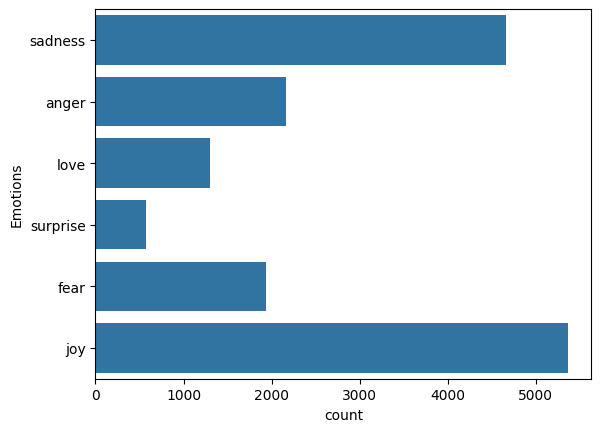

In [3]:
sns.countplot(data.Emotions)

In [4]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prisa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prisa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
#object of WordNetLemmatizer
lm = WordNetLemmatizer()


In [6]:
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [7]:
corpus = text_transformation(data['Text'])

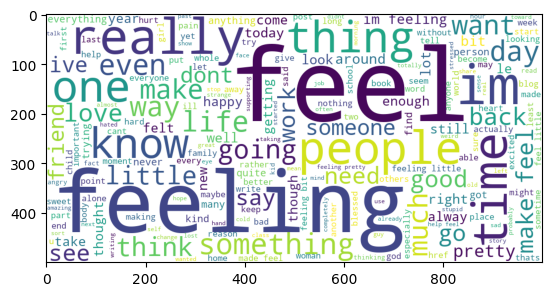

In [8]:
# rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

In [9]:
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(corpus)
X = traindata
y = data.Emotions

In [10]:
parameters = {'max_features': ('auto','sqrt'),
             'n_estimators': [500, 1000, 1500],
             'max_depth': [5, 10, None],
             'min_samples_split': [5, 10, 15],
             'min_samples_leaf': [1, 2, 5, 10],
             'bootstrap': [True, False]}

In [11]:
# cuML Libraries for GPU acceleration
from cuml.ensemble import RandomForestClassifier as cumlRFC

ModuleNotFoundError: No module named 'cuml'

In [ ]:
# grid_search = GridSearchCV(RandomForestClassifier(),parameters,cv=5,return_train_score=True,n_jobs=-1)
# grid_search.fit(X,y)
# grid_search.best_params_
grid_search = GridSearchCV(cumlRFC(), parameters, cv=5, return_train_score=True, n_jobs=-1)
grid_search.fit(X.toarray(), y)
best_params = grid_search.best_params_

KeyboardInterrupt: 

In [ ]:
for i in range(432):
    print('Parameters: ',grid_search.cv_results_['params'][i])
    print('Mean Test Score: ',grid_search.cv_results_['mean_test_score'][i])
    print('Rank: ',grid_search.cv_results_['rank_test_score'][i])